<a href="https://colab.research.google.com/github/PrachitiSParulekar/machine-learning-end-to-end-pipeline/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!git clone https://github.com/mirzahash/vehicle-loan-default-prediction.git
import pandas as pd
df = pd.read_csv('vehicle-loan-default-prediction/train.csv')
df.head()

Cloning into 'vehicle-loan-default-prediction'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 7 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 11.78 MiB | 19.40 MiB/s, done.
Resolving deltas: 100% (1/1), done.


FileNotFoundError: [Errno 2] No such file or directory: 'vehicle-loan-default-prediction/train.csv'

In [11]:
import pandas as pd

train_url = 'https://raw.githubusercontent.com/mirzahash/vehicle-loan-default-prediction/main/Train_Dataset.csv'
test_url = 'https://raw.githubusercontent.com/mirzahash/vehicle-loan-default-prediction/main/Test_Dataset.csv'
data_dict_url = 'https://raw.githubusercontent.com/mirzahash/vehicle-loan-default-prediction/main/Data_Dictionary%20(1).csv'

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)
data_dict_df = pd.read_csv(data_dict_url)

print(train_df.head())
print(test_df.head())

/tmp/ipython-input-4221070394.py:7: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_url)
/tmp/ipython-input-4221070394.py:8: DtypeWarning: Columns (7,8,16,17,18,19,20,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(test_url)


         ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509          6750        0.0         0.0          1.0        0.0   
1  12138936         20250        1.0         0.0          1.0        NaN   
2  12181264         18000        0.0         0.0          1.0        0.0   
3  12188929         15750        0.0         0.0          1.0        1.0   
4  12133385         33750        1.0         0.0          1.0        0.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client  ...  \
0          0.0      61190.55      3416.85            Alone  ...   
1          0.0         15282      1826.55            Alone  ...   
2          1.0      59527.35       2788.2            Alone  ...   
3          0.0       53870.4      2295.45            Alone  ...   
4          2.0      133988.4      3547.35            Alone  ...   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes        

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(train_df.info)

<bound method DataFrame.info of               ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0       12142509          6750        0.0         0.0          1.0        0.0   
1       12138936         20250        1.0         0.0          1.0        NaN   
2       12181264         18000        0.0         0.0          1.0        0.0   
3       12188929         15750        0.0         0.0          1.0        1.0   
4       12133385         33750        1.0         0.0          1.0        0.0   
...          ...           ...        ...         ...          ...        ...   
121851  12207714         29250        0.0         0.0          NaN        1.0   
121852  12173765         15750        0.0         1.0          1.0        0.0   
121853  12103937          8100        0.0         1.0          0.0        1.0   
121854  12170623         38250        1.0         1.0          0.0        1.0   
121855  12105610          9000        1.0         1.0          1.0        1.0

In [15]:
train_df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [16]:
train_df.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [17]:
# For categorical columns, look at value counts for each
categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(train_df[col].value_counts().head())


Column: Client_Income
Client_Income
13500    11908
11250    10302
15750     8719
18000     8215
9000      7577
Name: count, dtype: int64

Column: Credit_Amount
Credit_Amount
45000.0    2513
67500.0    2340
22500.0    2090
27000.0    1865
18000.0    1847
Name: count, dtype: int64

Column: Loan_Annuity
Loan_Annuity
900       1885
1350      1684
675        682
1012.5     622
3780       504
Name: count, dtype: int64

Column: Accompany_Client
Accompany_Client
Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Name: count, dtype: int64

Column: Client_Income_Type
Client_Income_Type
Service       61028
Commercial    27764
Retired       21043
Govt Job       8303
Student           8
Name: count, dtype: int64

Column: Client_Education
Client_Education
Secondary             83911
Graduation            28819
Graduation dropout     3960
Junior secondary       1455
Post Grad                66
Name: count, dtype: int64

Column: Client_Marital_Status
Client_Mari

In [18]:
print(train_df.isnull().sum())

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

For categorical columns (object/string), you can fill missing with the mode (most frequent value) or a placeholder (e.g., 'Unknown').

For numerical columns, fill with the mean or median (or 0 if it makes business sense).

In [20]:
# Fill missing values for numerical columns with median
num_cols_train = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[num_cols_train] = train_df[num_cols_train].fillna(train_df[num_cols_train].median())

# Exclude 'Default' from the numerical columns for the test set
num_cols_test = num_cols_train.drop('Default', errors='ignore')
test_df[num_cols_test] = test_df[num_cols_test].fillna(train_df[num_cols_train].median())


# Fill missing values for categorical columns with the mode
cat_cols = train_df.select_dtypes(include=['object']).columns
train_df[cat_cols] = train_df[cat_cols].fillna(train_df[cat_cols].mode().iloc[0])
test_df[cat_cols] = test_df[cat_cols].fillna(train_df[cat_cols].mode().iloc[0])

In [23]:
train_df[num_cols_train].head()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,0.0,0.0,1.0,0.0,0.0,9.0,1,1,0,2.0,2.0,6.0,17.0,0.568066,0.478787,0.0186,63.0,1.0,0
1,12138936,1.0,0.0,1.0,1.0,0.0,0.0,1,0,1,2.0,2.0,3.0,10.0,0.563360,0.215068,0.0887,755.0,1.0,0
2,12181264,0.0,0.0,1.0,0.0,1.0,9.0,1,0,0,2.0,2.0,4.0,12.0,0.504657,0.552795,0.0742,277.0,0.0,0
3,12188929,0.0,0.0,1.0,1.0,0.0,9.0,1,0,0,2.0,3.0,2.0,15.0,0.504657,0.135182,0.0887,1700.0,3.0,0
4,12133385,1.0,0.0,1.0,0.0,2.0,6.0,1,0,0,4.0,1.0,3.0,12.0,0.508199,0.301182,0.2021,674.0,1.0,0


Encode Categorical Variables
We'll use Label Encoding for simplicity. This method assigns each unique category a different integer.

In [26]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Instantiate the encoder
le = LabelEncoder()

# Loop through each categorical column and encode
for col in cat_cols:
    # Get unique values from training data, including 'XNA' if it's not already there
    train_unique_values = list(train_df[col].astype(str).unique())
    if 'XNA' not in train_unique_values:
        train_unique_values.append('XNA')

    le.fit(train_unique_values)

    test_df[col] = test_df[col].apply(lambda x: 'XNA' if x not in le.classes_ else x)

    train_df[col] = le.transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))


# Check the first few rows to confirm changes
print(train_df[cat_cols].head())

   Client_Income  Credit_Amount  Loan_Annuity  Accompany_Client  \
0            691           3496          5339                 1   
1             39           1325          1897                 1   
2           1429           3442          4005                 1   
3           1282           3220          2929                 1   
4            414            983          5599                 1   

   Client_Income_Type  Client_Education  Client_Marital_Status  Client_Gender  \
0                   1                 4                      1              1   
1                   5                 0                      1              1   
2                   5                 1                      3              1   
3                   4                 4                      1              1   
4                   1                 4                      1              0   

   Loan_Contract_Type  Client_Housing_Type  Population_Region_Relative  \
0                   0               

In [27]:
#Separate Features and Target
# Change 'target_column' below to the actual target column name in your dataset!
target_column = 'Default'  # Example; replace with actual target name

X_train = train_df.drop([target_column], axis=1)
y_train = train_df[target_column]
X_test = test_df  # Usually test set doesn't have target

print(X_train.shape)
print(y_train.shape)

(121856, 39)
(121856,)


In [28]:
#Train an XGBoost Classifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split training data for local validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Instantiate the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model
model.fit(X_tr, y_tr)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:50:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [29]:
# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.9200722140160841
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22425
           1       0.50      0.05      0.09      1947

    accuracy                           0.92     24372
   macro avg       0.71      0.52      0.53     24372
weighted avg       0.89      0.92      0.89     24372



Feature Importance and Test Set Prediction
a) Plot Feature Importance

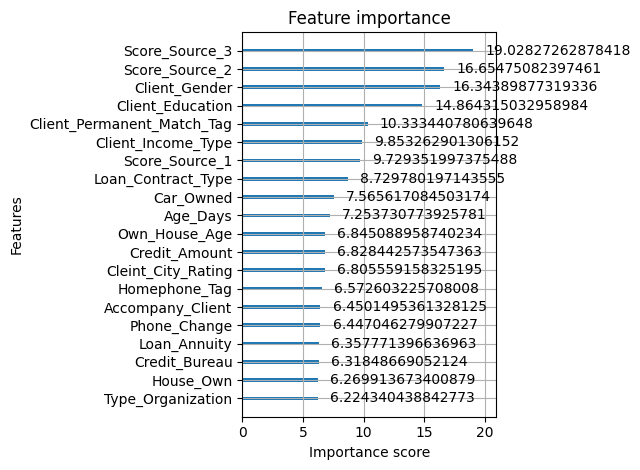

In [30]:
# Plot top 20 important features
xgb.plot_importance(model, max_num_features=20, importance_type='gain')
plt.tight_layout()
plt.show()

In [33]:
# Convert any remaining object columns to numeric, coercing errors
for col in X_test.select_dtypes(include=['object']).columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Fill any NaNs created by coercion with the median of numerical columns from the training data
X_test.fillna(train_df[num_cols_train].median(), inplace=True)


# Predict for the test set
test_predictions = model.predict(X_test)

print(test_predictions[:10])  # Show first 10 predictions

[0 0 0 0 0 0 0 0 0 0]


In [34]:
from sklearn.metrics import roc_auc_score
print("ROC-AUC:", roc_auc_score(y_val, model.predict_proba(X_val)[:,1]))

ROC-AUC: 0.7368626460741421


In [36]:
from sklearn.metrics import f1_score

# Calculate F1 score on the validation set
f1 = f1_score(y_val, y_pred)

print("Validation F1 Score:", f1)

Validation F1 Score: 0.09226467847157502


In [37]:
#add class weights
# Calculate class weights
ratio = sum(y_train == 0) / sum(y_train == 1)
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=ratio)
model.fit(X_tr, y_tr)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:59:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [39]:
y_pred_weighted = model.predict(X_val)
print("Validation Accuracy (weighted):", accuracy_score(y_val, y_pred_weighted))
print(classification_report(y_val, y_pred_weighted))

Validation Accuracy (weighted): 0.7838503200393895
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     22425
           1       0.25      0.86      0.39      1947

    accuracy                           0.78     24372
   macro avg       0.62      0.82      0.63     24372
weighted avg       0.93      0.78      0.83     24372



In [40]:
# Get predictions and predicted probabilities from the weighted model on the validation set
y_pred_weighted = model.predict(X_val)
y_pred_proba_weighted = model.predict_proba(X_val)[:, 1]

# Calculate F1 score
f1_weighted = f1_score(y_val, y_pred_weighted)
print("Validation F1 Score (weighted):", f1_weighted)

# Calculate ROC AUC score
roc_auc_weighted = roc_auc_score(y_val, y_pred_proba_weighted)
print("Validation ROC AUC Score (weighted):", roc_auc_weighted)

Validation F1 Score (weighted): 0.3884374274436963
Validation ROC AUC Score (weighted): 0.8988849437633519


In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
# Train on resampled data
model.fit(X_res, y_res)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:00:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [42]:
y_pred_SMOTE = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_SMOTE))
print(classification_report(y_val, y_pred_SMOTE))

Validation Accuracy: 0.7838503200393895
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     22425
           1       0.25      0.86      0.39      1947

    accuracy                           0.78     24372
   macro avg       0.62      0.82      0.63     24372
weighted avg       0.93      0.78      0.83     24372



In [43]:
# Get predictions and predicted probabilities from the SMOTE model on the validation set
y_pred_SMOTE = model.predict(X_val)
y_pred_proba_SMOTE = model.predict_proba(X_val)[:, 1]

# Calculate F1 score
f1_SMOTE = f1_score(y_val, y_pred_SMOTE)
print("Validation F1 Score (SMOTE):", f1_SMOTE)

# Calculate ROC AUC score
roc_auc_SMOTE = roc_auc_score(y_val, y_pred_proba_SMOTE)
print("Validation ROC AUC Score (SMOTE):", roc_auc_SMOTE)

Validation F1 Score (SMOTE): 0.3884374274436963
Validation ROC AUC Score (SMOTE): 0.8988849437633519


In [47]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'max_depth': [3],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 250],
    'scale_pos_weight': [ratio]
}

grid_search = GridSearchCV(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid,
    scoring='f1',
    cv=3,
    verbose=2
)

grid_search.fit(X_tr, y_tr)
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

# Use the best estimator for predictions.
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:32:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, scale_pos_weight=11.377450482478416; total time=   4.8s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:32:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, scale_pos_weight=11.377450482478416; total time=   2.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:32:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, scale_pos_weight=11.377450482478416; total time=   3.7s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:32:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, scale_pos_weight=11.377450482478416; total time=   3.1s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:32:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, scale_pos_weight=11.377450482478416; total time=   3.9s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:32:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, scale_pos_weight=11.377450482478416; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:32:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=11.377450482478416; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:32:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=11.377450482478416; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:32:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=11.377450482478416; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:32:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, scale_pos_weight=11.377450482478416; total time=   1.9s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:32:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, scale_pos_weight=11.377450482478416; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:32:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, scale_pos_weight=11.377450482478416; total time=   3.9s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:32:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250, 'scale_pos_weight': 11.377450482478416}
Best F1 score: 0.26125570412329335


In [48]:
best_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.1,
    max_depth=3,
    n_estimators=250,
    scale_pos_weight=11.38,
    random_state=42
)
best_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:35:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, ...)

In [49]:
y_val_pred = best_model.predict(X_val)  # Or use cross-validation
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     22425
           1       0.17      0.70      0.27      1947

    accuracy                           0.71     24372
   macro avg       0.57      0.70      0.55     24372
weighted avg       0.90      0.71      0.77     24372



In [58]:
# Generate predictions on your test dataset
test_predictions = best_model.predict(X_test)

# If your test set DOES NOT have IDs:
submission = pd.DataFrame({'Default': test_predictions})

# If your test set HAS an ID column, for example 'Unique_ID', use this:
#submission = pd.DataFrame({'Unique_ID': test_df['Unique_ID'], 'Default': test_predictions})

# Save to CSV
submission.to_csv('xgboost_final_predictions.csv', index=False)